In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [2]:
dataset = pd.read_csv('data.csv')
df = dataset.copy()

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [5]:
df.diagnosis = pd.get_dummies(df.diagnosis)
df.diagnosis.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: uint8

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    uint8  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
# no duplicates
df.duplicated().any().sum()

0

In [8]:
# no missing values
df.isna().any().sum()

0

<AxesSubplot:>

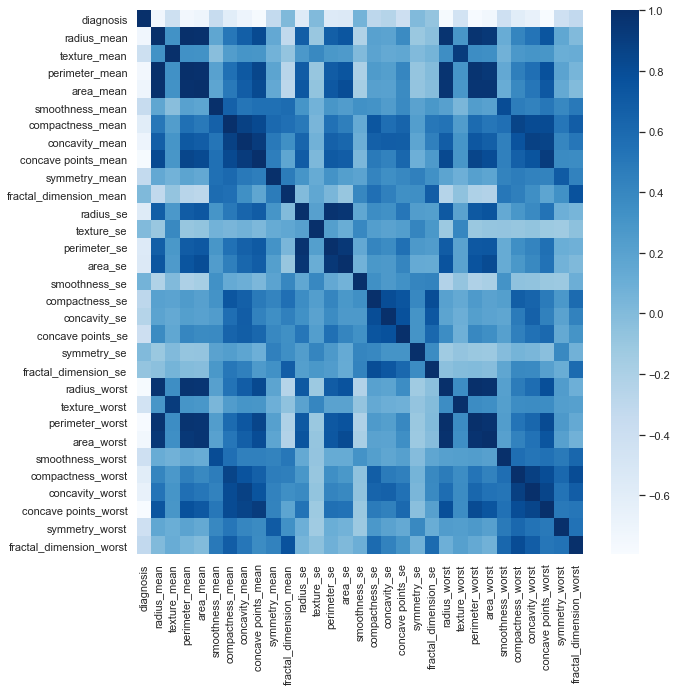

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), cmap='Blues')

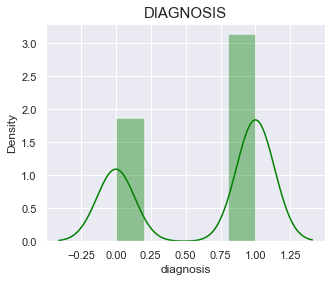

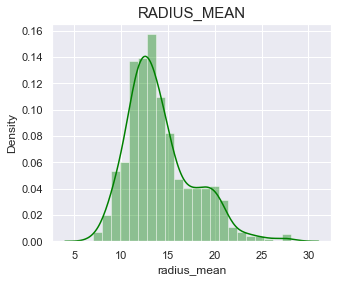

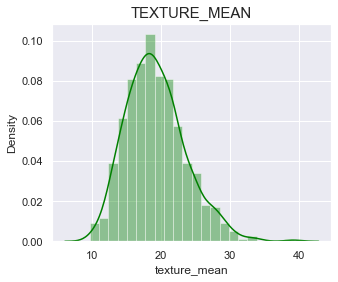

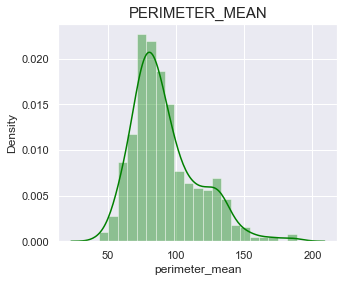

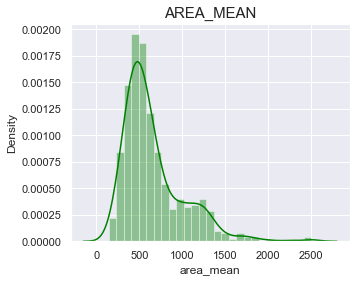

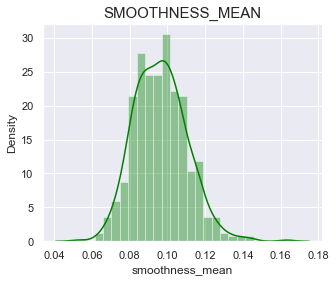

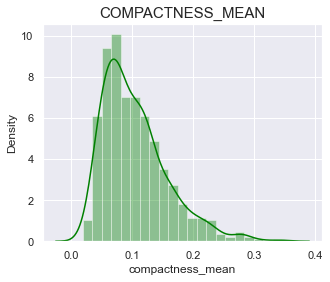

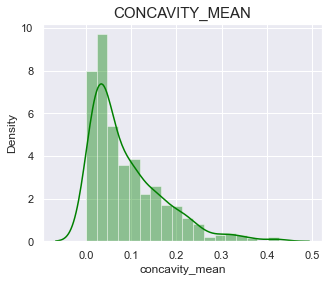

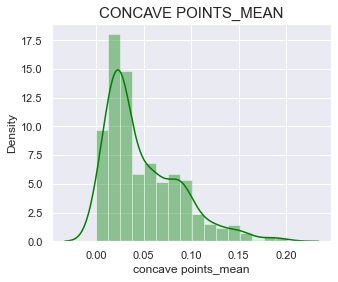

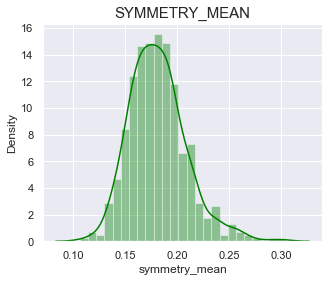

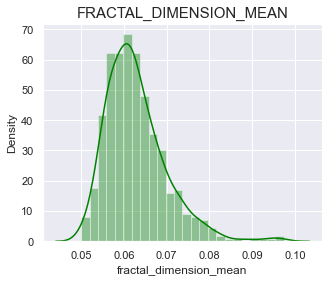

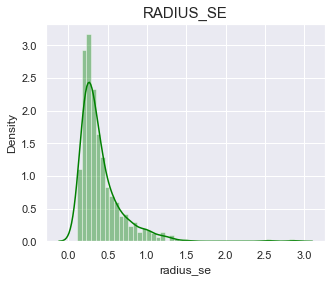

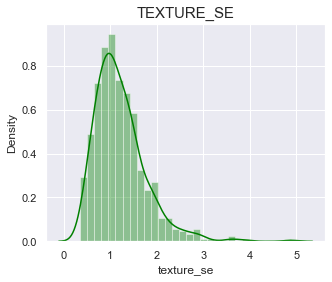

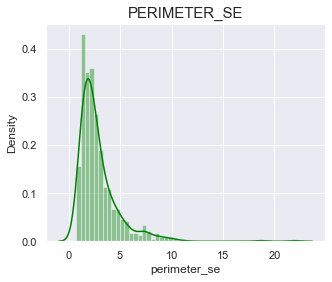

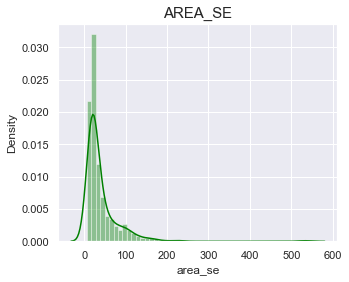

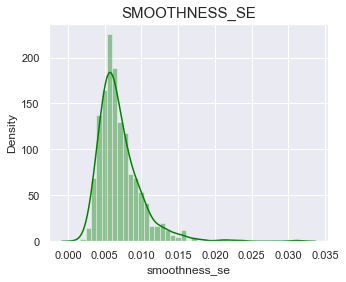

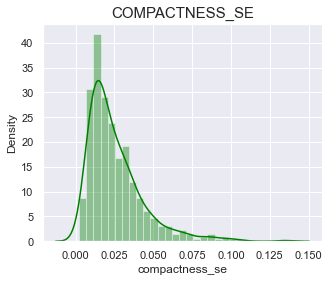

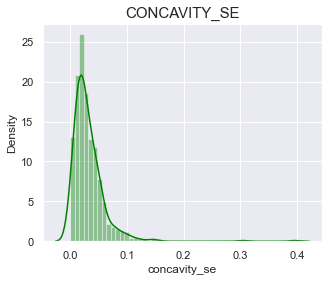

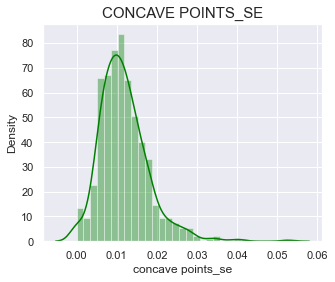

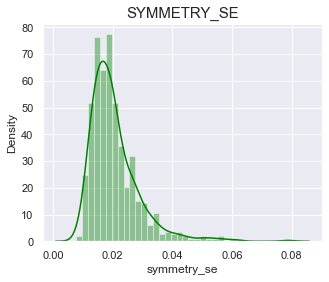

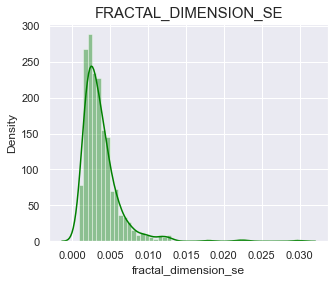

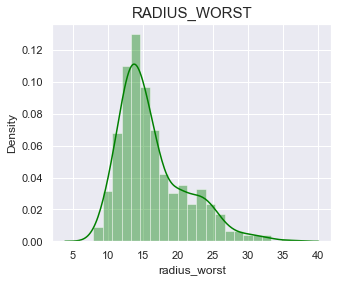

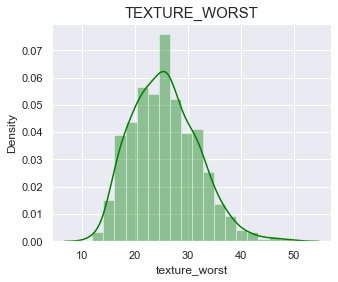

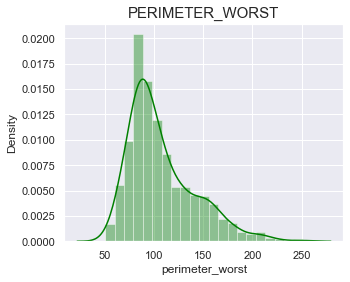

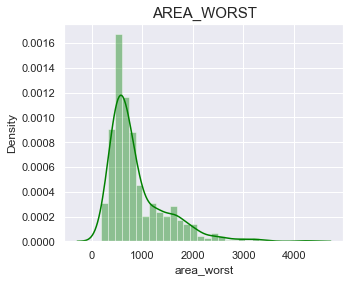

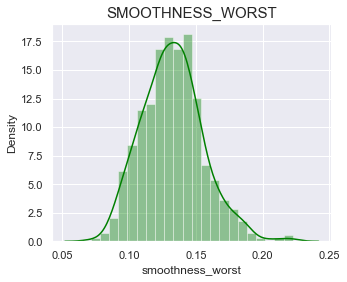

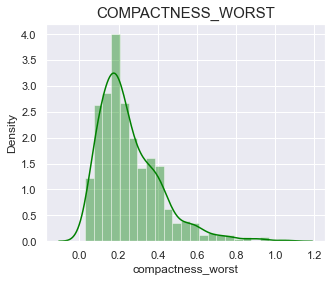

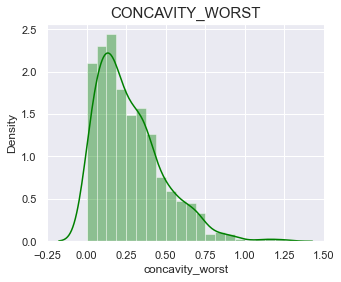

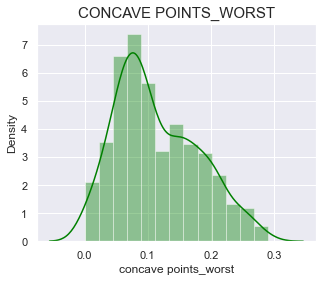

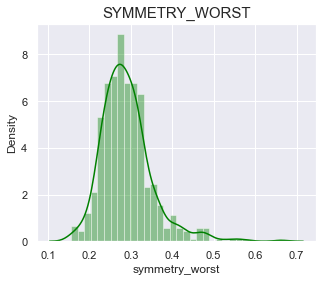

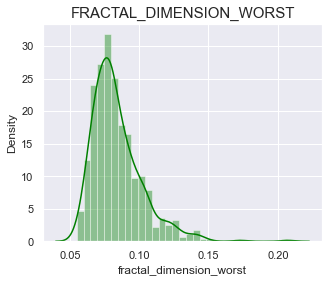

In [10]:
for column in df.columns:
    plt.figure(figsize=(5,4))
    sns.distplot(df[column], color='Green')
    plt.title(f"{column.upper()}", size=15)
    plt.show()

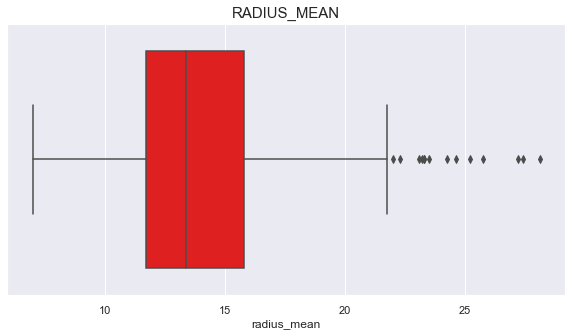

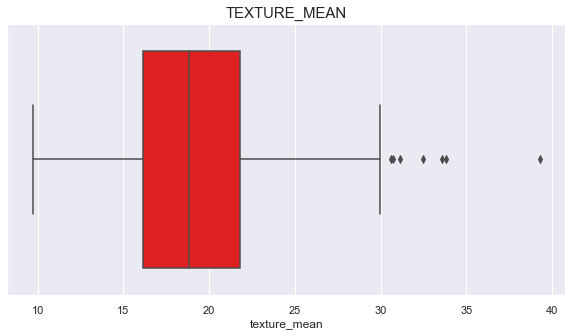

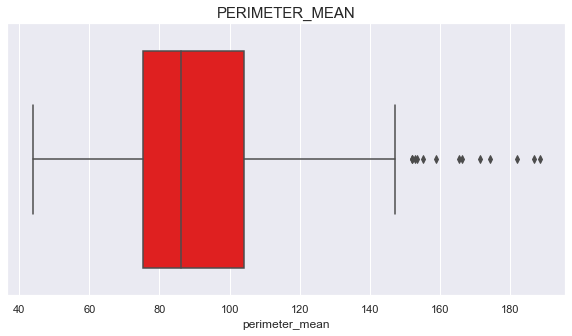

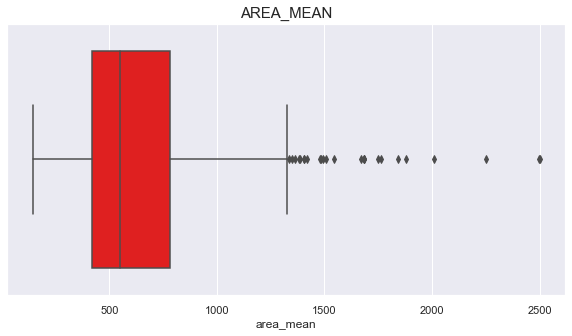

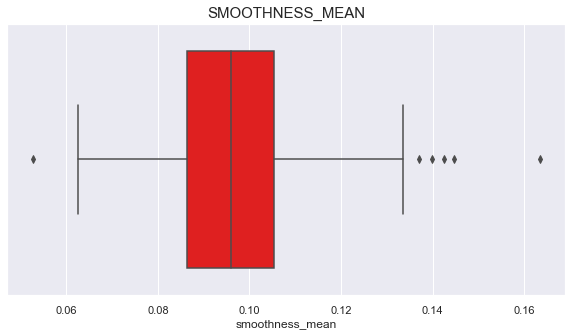

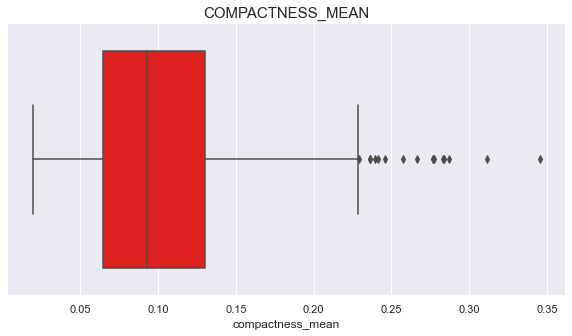

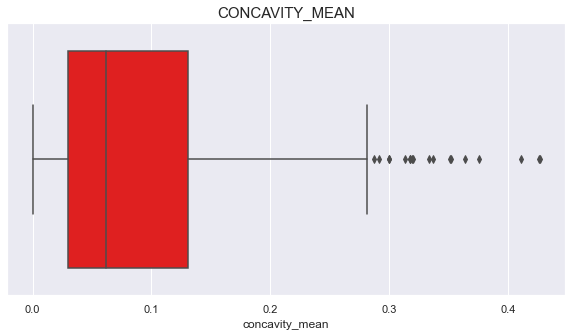

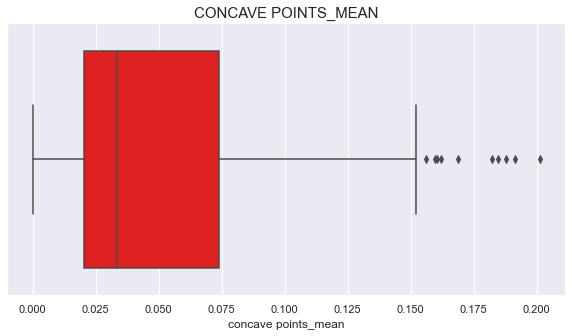

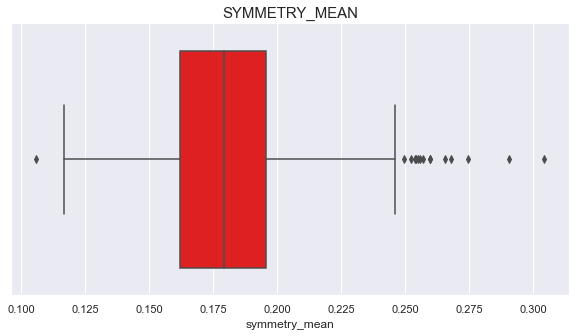

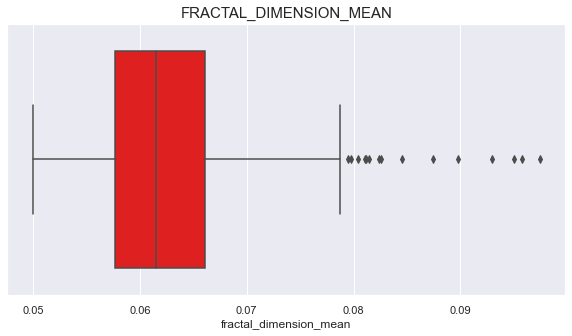

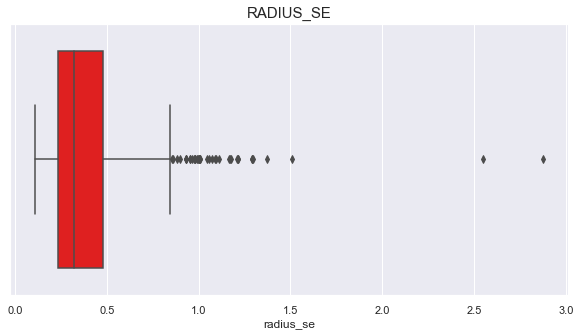

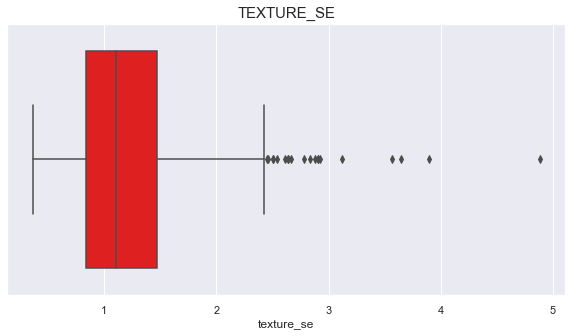

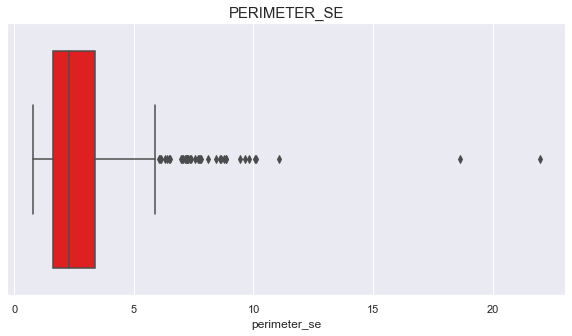

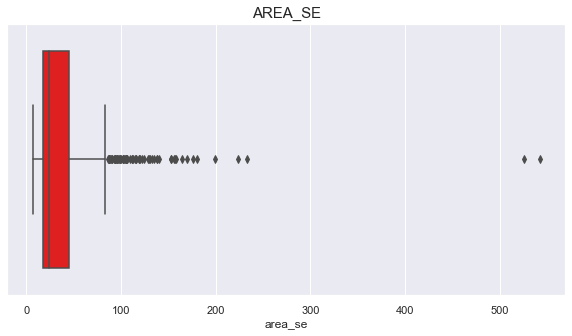

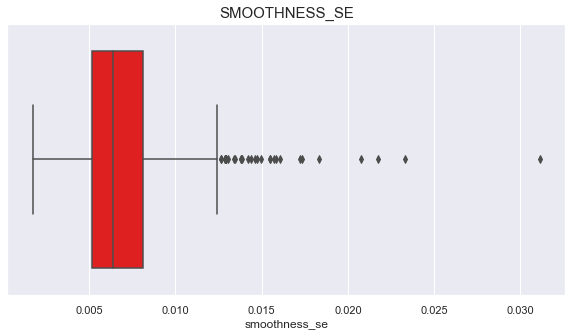

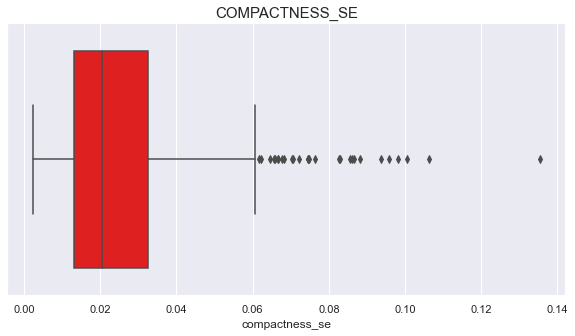

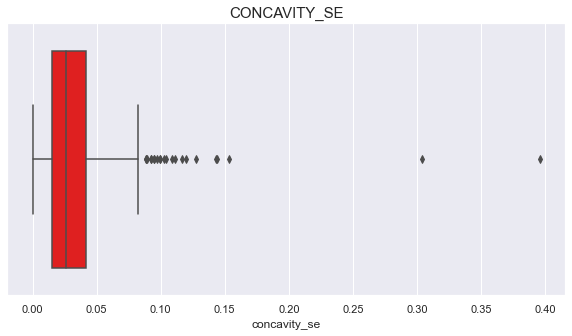

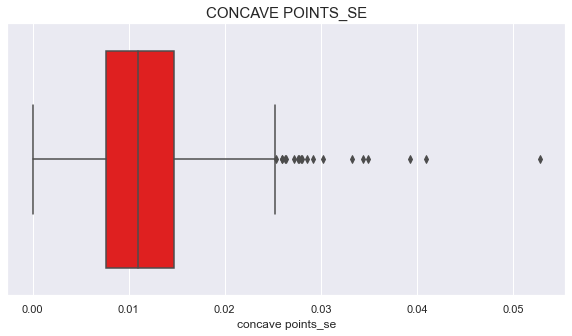

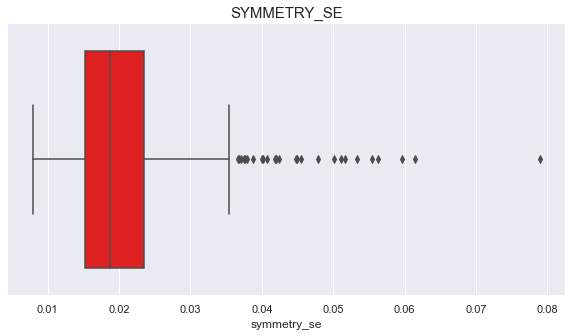

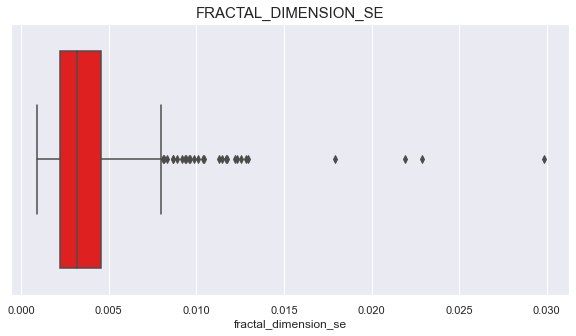

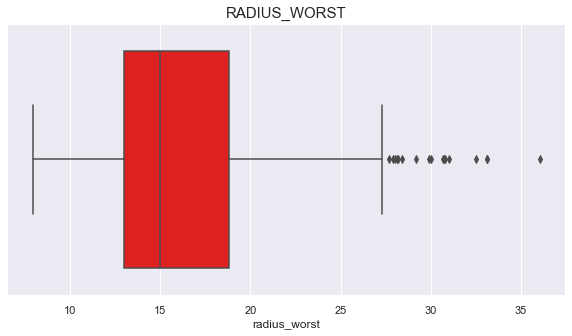

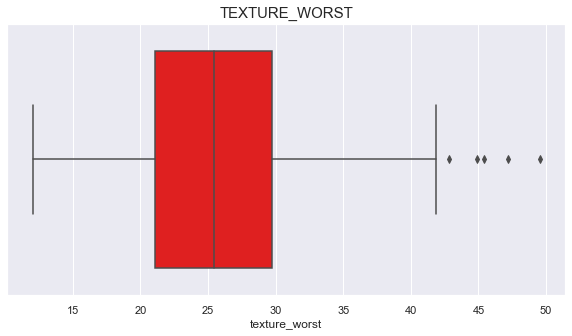

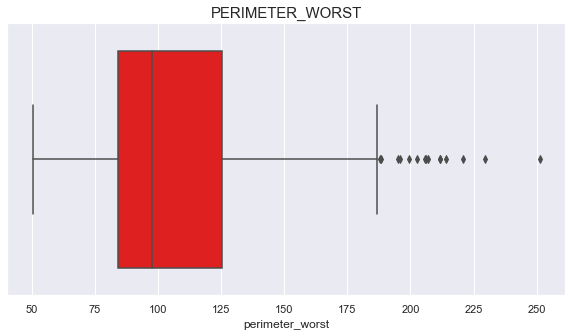

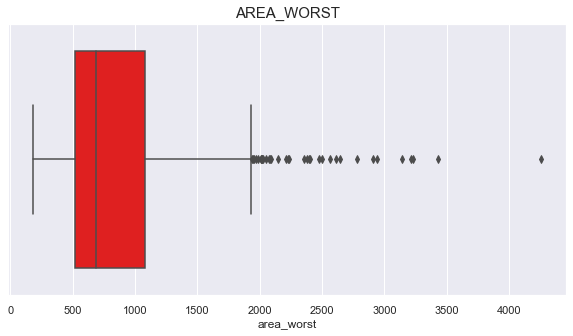

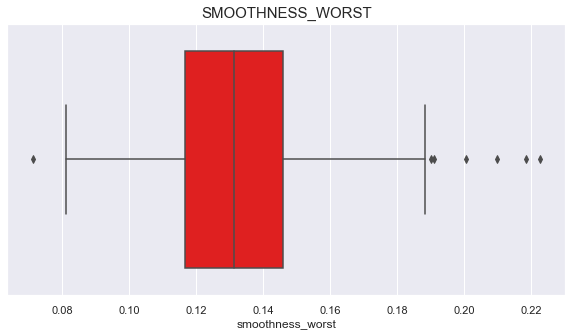

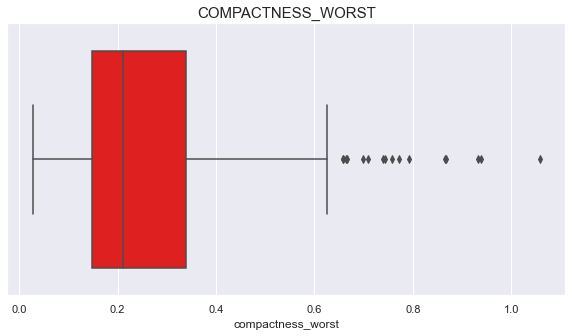

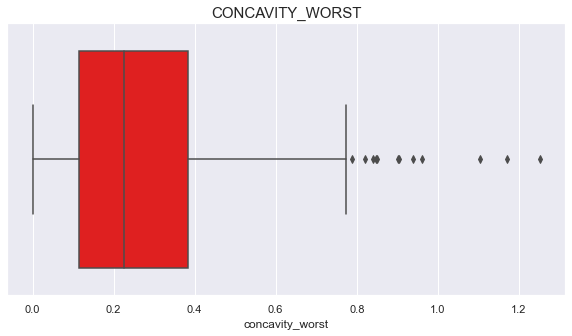

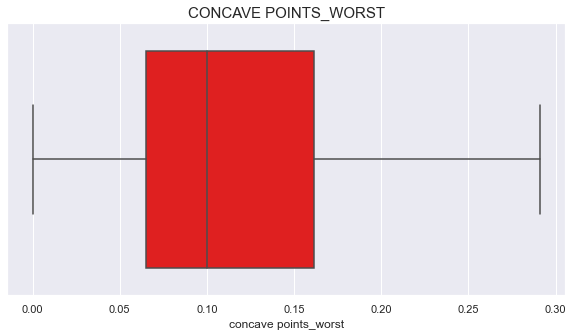

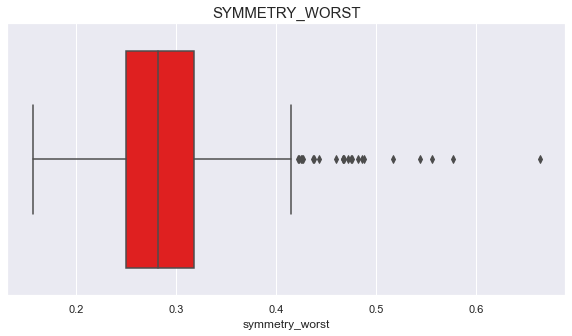

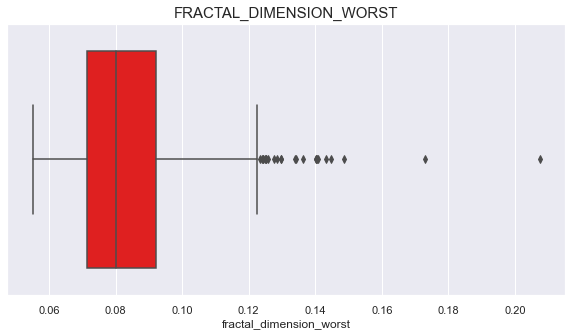

In [11]:
for column in df.drop('diagnosis', axis = 1):
    plt.figure(figsize=(10,5))
    sns.boxplot(df[column], color='Red')
    plt.title(f"{column.upper()}", size=15)
    plt.show()

In [12]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_col = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

df[numerical_col] = scaler.fit_transform(df[numerical_col] )

In [14]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,0,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [15]:
features = df.drop('diagnosis', axis=1)
target = df.diagnosis

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features, target,test_size=0.3, random_state=123)


# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=123)
model_lr.fit(X_train, Y_train)
pred1 = model_lr.predict(X_test)
Accuracy_lr = (Y_test == pred1).mean()
print('Model Accuracy:',Accuracy_lr)

Model Accuracy: 0.9941520467836257


In [18]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, pred1)
cm1

array([[ 67,   1],
       [  0, 103]], dtype=int64)

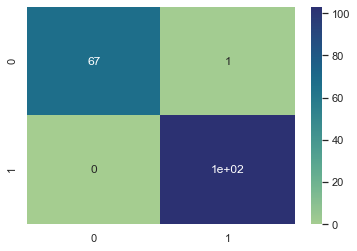

In [19]:
sns.heatmap(data=cm1, annot=True, cmap= 'crest');

# Support Vector Machines Classifier

In [20]:
from sklearn.svm import SVC
model_svc = SVC(random_state=123)
model_svc.fit(X_train, Y_train)
pred2 = model_svc.predict(X_test)
Accuracy_svc = (Y_test == pred2).mean()
print('Model Accuracy:',Accuracy_svc)

Model Accuracy: 0.9824561403508771


In [21]:
cm2 = confusion_matrix(Y_test, pred2)
cm2

array([[ 66,   2],
       [  1, 102]], dtype=int64)

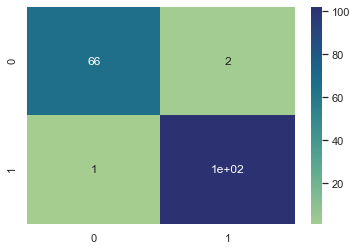

In [22]:
sns.heatmap(data=cm2, annot=True, cmap= 'crest');

# Random Forests

In [23]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)
pred3 = model_rf.predict(X_test)
Accuracy_rf = (Y_test == pred3).mean()
print('Model Accuracy:',Accuracy_rf)

Model Accuracy: 0.9824561403508771


In [24]:
cm3 = confusion_matrix(Y_test, pred3)
cm3

array([[ 66,   2],
       [  1, 102]], dtype=int64)

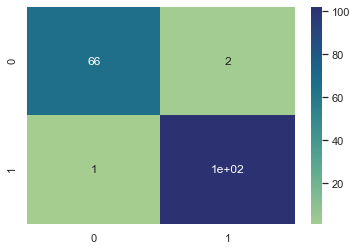

In [25]:
sns.heatmap(data=cm3,annot= True, cmap='crest');

# Gradient Boosting

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, Y_train)
pred4 = model_gb.predict(X_test)
Accuracy_gb = (Y_test == pred4).mean()
print('Model Accuracy:',Accuracy_gb)

Model Accuracy: 0.9649122807017544


In [27]:
cm4 = confusion_matrix(Y_test, pred4)
cm4

array([[ 64,   4],
       [  2, 101]], dtype=int64)

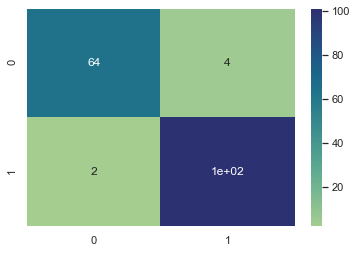

In [28]:
sns.heatmap(data=cm4,annot= True, cmap='crest');

# Decision Trees

In [29]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=2)
model_dt.fit(X_train, Y_train)
pred5 = model_dt.predict(X_test)
Accuracy_dt = (Y_test == pred5).mean()
print('Model Accuracy:',Accuracy_dt)

Model Accuracy: 0.9473684210526315


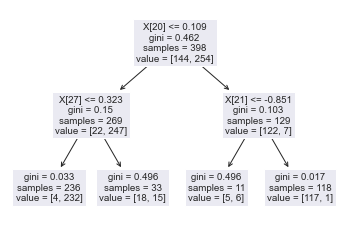

In [30]:
from sklearn import tree
tree.plot_tree(model_dt);

In [31]:
print('Important Columns in Decision Tree: ')
print(df.columns[20])
print(df.columns[21]) 
print(df.columns[27])

Important Columns in Decision Tree: 
fractal_dimension_se
radius_worst
concavity_worst


# Different Models Accuracy On Test Set

In [32]:
print(f'Logistic Regression Accuracy-----------:{Accuracy_lr.round(3)}')
print(f'Gradient Boost Accuracy----------------:{Accuracy_gb.round(3)}')
print(f'Support Vector Machines Accuracy-------:{Accuracy_svc.round(3)}')
print(f'Random Forests Accuracy----------------:{Accuracy_rf.round(3)}')
print(f'Decision Trees Accuracy----------------:{Accuracy_dt.round(3)}')

Logistic Regression Accuracy-----------:0.994
Gradient Boost Accuracy----------------:0.965
Support Vector Machines Accuracy-------:0.982
Random Forests Accuracy----------------:0.982
Decision Trees Accuracy----------------:0.947
